#**Human Activity Recognition  with Smartphones**
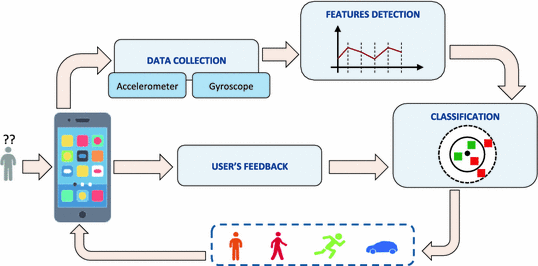

We will be using the Human Activity Recognition with Smartphones database
(https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) , which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors.

The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.
For each record in the dataset it is provided: 
- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope.
- A 561-feature vector with time and frequency domain variables.
- Its activity label.

Importing necessary libraries:

In [63]:
import os
import matplotlib.pyplot as plt
import  seaborn as sns
import  pandas as pd
import numpy as np
%matplotlib inline

#Exploring the data:

In [64]:
df= pd.read_csv('data.csv')

In [65]:
df.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING


In [66]:
df.shape

(10299, 562)

In [67]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 44.2+ MB


In [69]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)

Let's split the data into features and labels 

In [70]:
features= pd.DataFrame(df.iloc[:,:-1])
label= pd.DataFrame(df.iloc[:,-1])

In [71]:
label.head(2)

,Activity
0,STANDING
1,STANDING


In [72]:
features.shape

(10299, 561)

In [73]:
label.value_counts()

Activity          
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
dtype: int64

In [74]:
features.min().value_counts()

-1.0    561
dtype: int64

In [75]:
features.max().value_counts()

1.0    561
dtype: int64

So as we can see our data have 561 features and 1 label identifying the status of the body.

Our data have 10299 data points 

________________________________________________________________________________

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either "LabelEncoder" needs to be used to convert the activity labels to integers, or if "DictVectorizer" is used, the resulting matrix must be converted to a non-sparse array.

Use "LabelEncoder" to fit_transform the "Activity" column, and look at 5 random values.

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label['Activity'] = le.fit_transform(label.Activity)
label['Activity'].sample(5)

277      3
9576     2
8804     3
10296    5
790      3
Name: Activity, dtype: int64

In [77]:
label

,Activity
0,2
1,2
2,2
3,2
4,2
...,...
10294,5
10295,5
10296,5
10297,5


In [78]:
corr_values= features.corr()
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,0.004590,-0.046352,-0.024185,1.000000,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,-0.016785,-0.046996,-0.023745,0.922525,1.000000,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.036047,0.013241,-0.066233,0.027464,0.001902,-0.004984,0.027729,-0.002924,-0.009873,0.033533,...,-0.029273,0.042123,0.035684,-0.013009,0.010679,1.000000,-0.112454,-0.007095,-0.006444,-0.015380
"angle(tBodyGyroJerkMean,gravityMean)",0.034296,0.077627,-0.030748,-0.027123,-0.015784,-0.012196,-0.027097,-0.013411,-0.012800,-0.030908,...,-0.002618,-0.013065,-0.011829,-0.027478,0.023605,-0.112454,1.000000,0.024822,-0.004582,-0.012549
"angle(X,gravityMean)",-0.041021,-0.007513,0.003215,-0.374104,-0.381391,-0.353271,-0.371168,-0.378013,-0.355836,-0.384244,...,0.087571,-0.085226,-0.081971,0.008050,0.017534,-0.007095,0.024822,1.000000,-0.748249,-0.635231
"angle(Y,gravityMean)",0.034053,-0.005616,-0.012986,0.449425,0.506106,0.459092,0.444926,0.507947,0.460345,0.458832,...,-0.105752,0.087671,0.078010,0.003082,-0.007256,-0.006444,-0.004582,-0.748249,1.000000,0.545614


**Well, I don't think that .corr() will work well with that number of features so let's create another way to explore that correlation**

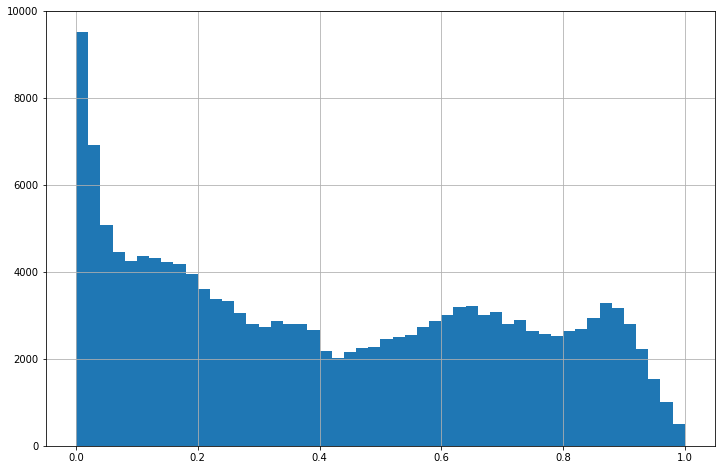

In [79]:
tril_index= np.tril_indices_from(corr_values)
corr_array= np.array(corr_values)
corr_array[tril_index]= np.nan
corr_values= pd.DataFrame(corr_array, columns=corr_values.columns, index=corr_values.index)
corr_values= corr_values.stack().to_frame().rename(columns={'level_0':'feature1','level_1':'feature2', 0:'correlation'})
corr_values['abs_corr'] = corr_values['correlation'].abs()

corr_values['abs_corr'].hist(bins=50, figsize=(12,8))

**I am curious about which features are highly correlated so I will write a line of code to see at least 20 of them**

In [80]:
corr_values.sort_values('correlation', ascending=False).query('abs_corr> 0.8').head(20)

,,correlation,abs_corr
fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.0,1.0
tBodyAccMag-sma(),tGravityAccMag-sma(),1.0,1.0
tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.0,1.0
tGravityAccMag-mean(),tGravityAccMag-sma(),1.0,1.0
tBodyAccMag-energy(),tGravityAccMag-energy(),1.0,1.0
tBodyAccMag-std(),tGravityAccMag-std(),1.0,1.0
fBodyBodyAccJerkMag-mean(),fBodyBodyAccJerkMag-sma(),1.0,1.0
tBodyAccMag-arCoeff()1,tGravityAccMag-arCoeff()1,1.0,1.0
tBodyAccMag-max(),tGravityAccMag-max(),1.0,1.0
tBodyAccMag-arCoeff()2,tGravityAccMag-arCoeff()2,1.0,1.0


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.3, random_state=42)

In [82]:
y_train.value_counts(normalize=True)

Activity
2           0.188514
0           0.186850
1           0.168401
3           0.164100
5           0.155361
4           0.136773
dtype: float64

In [83]:
y_test.value_counts(normalize=True)

Activity
0           0.193204
1           0.182201
2           0.177023
3           0.174434
5           0.137217
4           0.135922
dtype: float64

**It is time to build up our models**

In [84]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import RandomizedSearchCV

In [85]:
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
coefficients = list()
coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]
for lab,mod in zip(coeff_labels, coeff_models):

  coeffs = mod.coef_
  coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]],
                             codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
  coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)


In [87]:
coefficients.head(6)

lr                                                          l1  \
          0         1         2         3         4         5         0   
0 -0.108400 -0.228926  0.161644 -0.222112  0.708085 -0.171016 -0.432129   
1  0.006316 -0.058381  0.177305 -0.047245  0.185517 -0.381407  0.000000   
2  0.054330 -0.192846  0.272998  0.087128  0.127130 -0.274616  0.000000   
3  0.000284 -0.653861 -0.391093 -0.679560  0.302377  0.663822  0.000000   
4 -0.055087  0.002640 -0.487276  0.293587 -0.595484  0.248546  0.000000   
5  0.010251 -0.351897 -0.009517 -0.032998 -0.370918  0.218585  0.000000   

                                                            l2            \
          1         2         3         4          5         0         1   
0  0.000000  0.000000 -1.621042  1.522504  -1.577700 -0.169381 -0.496277   
1  0.000000  0.000000  0.000000  0.000000 -15.097002  0.011857 -0.188678   
2  0.000000  0.000000  0.000000  0.000000  -0.683730  0.088060 -0.546671   
3 -0.918660 -0.411391 -1.028637  0.000000   2.468949  0.007307 -0.993596   
4  0.000000 -1.226911  0.026312 -0.976074   1.506103 -0.058475  0.103075   
5 -0.135416  0.000000  0.000000  0.000000  -0.169861  0.034910 -0.528010   

                                           
          2         3         4         5  
0  6.598591 -0.711622  1.939895 -0.197804  
1  2.621078 -0.172747  0.584739 -0.507197  
2  2.858673  0.323328  0.428398 -0.382215  
3 -2.735076 -1.773275  0.571579  0.935342  
4 -2.726895  1.015223 -1.523575  0.324641  
5  0.909849 -0.079519 -0.906510  0.263108

In [88]:
coefficients.shape

(561, 18)

**As we have 561 features with 6 labels we want to visualize feature coefficients with each class so we structured 6 figures - one fig for each class - to see the relation between coefficients and classes**

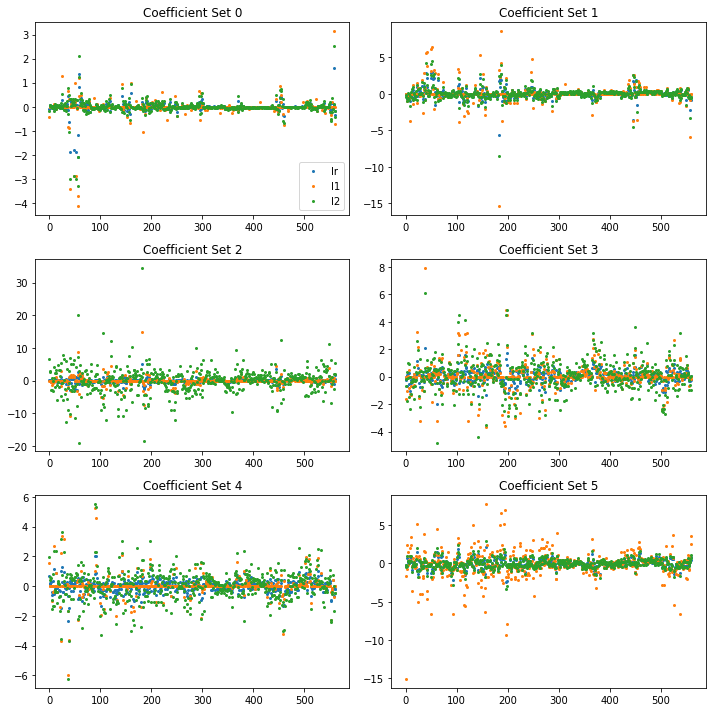

In [89]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)
for loc, ax in enumerate(axList):
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)

    if ax is axList[0]:
      ax.legend(loc=4)

    ax.set(title='Coefficient Set '+str(loc))
plt.tight_layout()

**Okay, It is time to use our models and predict propabilites and class for our testing set **

In [90]:
pd.DataFrame(lr.predict_proba(X_test))

,0,1,2,3,4,5
0,0.000029,2.563887e-05,1.446706e-04,9.934092e-01,6.194569e-03,1.968583e-04
1,0.999977,2.092187e-05,8.363067e-11,1.853066e-08,2.448708e-06,1.981354e-10
2,0.000049,4.167855e-01,5.831645e-01,1.749382e-09,1.294633e-06,2.666382e-09
3,0.000127,5.597024e-02,9.439025e-01,1.259275e-08,2.822163e-08,4.244756e-08
4,0.000067,9.510770e-05,9.737283e-07,9.676487e-01,2.857404e-03,2.933121e-02
...,...,...,...,...,...,...
3085,0.999586,4.103383e-04,2.130896e-10,3.192037e-08,3.570399e-06,2.218595e-10
3086,0.000037,1.635684e-04,3.626287e-05,1.659979e-04,4.911472e-06,9.995918e-01
3087,0.000050,9.960238e-01,3.925479e-03,1.893494e-09,5.200159e-07,5.141965e-09
3088,0.000144,4.786824e-02,9.519609e-01,1.879174e-07,2.679474e-05,3.013935e-12


In [91]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    #Taking .max() of probability 
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,3,3,3
1,0,0,0
2,2,2,2
3,2,2,2
4,3,3,3


In [92]:
y_prob.head()

,lr,l1,l2
0,0.993409,0.996728,0.999929
1,0.999977,1.000000,0.999999
2,0.583165,0.624233,0.541634
3,0.943903,0.978274,0.966834
4,0.967649,0.994743,0.982574


In [93]:
y_pred[y_pred.lr != y_pred.l1]

,lr,l1,l2
110,2,1,1
621,1,2,1
700,2,1,2
776,2,1,1
1047,3,4,4
1052,2,1,2
1100,2,3,1
1118,1,2,2
1122,1,2,2
1134,2,1,1


In [94]:
y_prob.head()

,lr,l1,l2
0,0.993409,0.996728,0.999929
1,0.999977,1.000000,0.999999
2,0.583165,0.624233,0.541634
3,0.943903,0.978274,0.966834
4,0.967649,0.994743,0.982574


In [99]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Precision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar inst

In [100]:
metrics

,lr,l1,l2
precision,0.978948,0.982814,0.982471
recall,0.978964,0.982848,0.982524
fscore,0.978939,0.982829,0.982492
accuracy,0.978964,0.982848,0.982524
auc,0.000000,0.000000,0.000000


In [101]:
le.classes_


array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [107]:
coeff_labels

['lr', 'l1', 'l2']

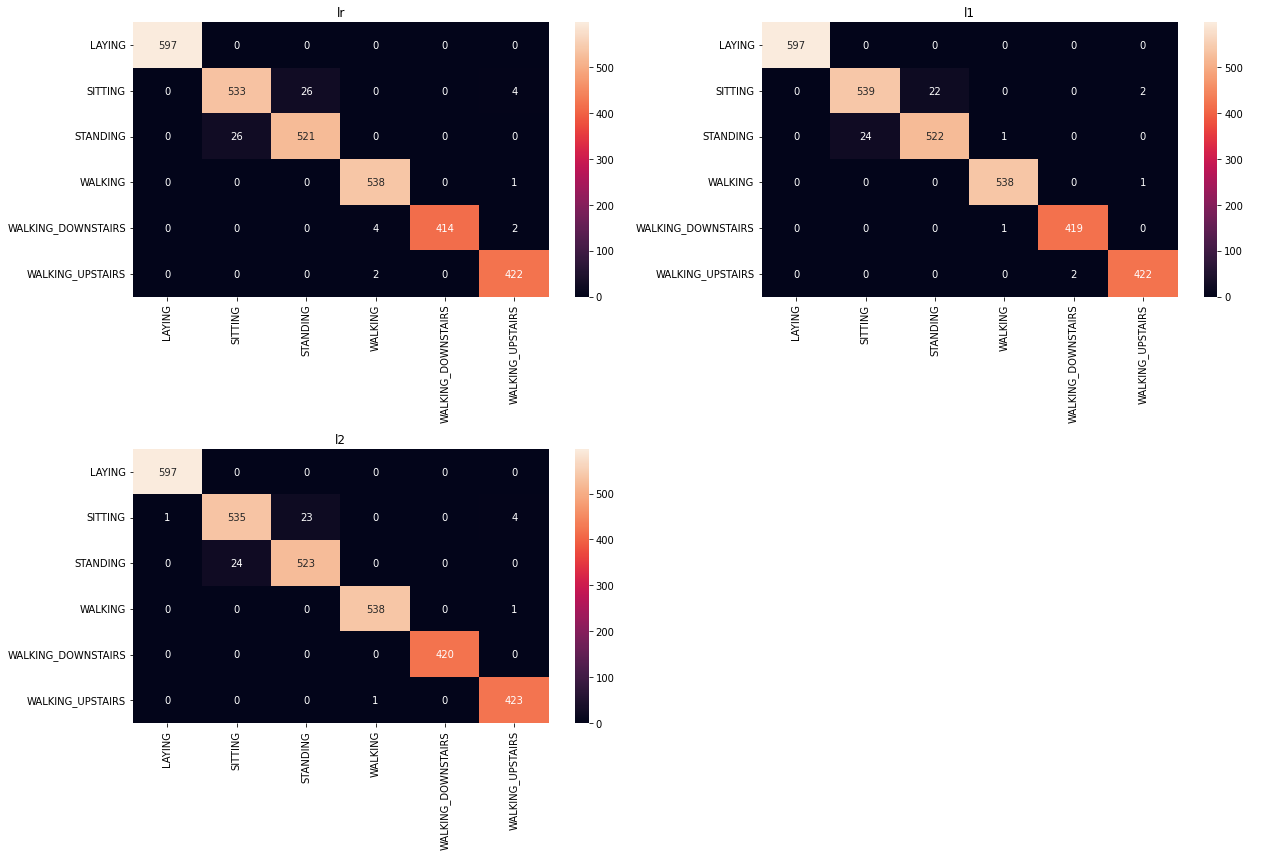

In [119]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(18, 12)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    #sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d', cmap=colors);
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    ax.set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'],rotation = 90)
    ax.set_yticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'],rotation =0)

plt.tight_layout()